In [0]:
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD

In [52]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

print(x_train.shape)

(60000, 28, 28)


(28, 28)


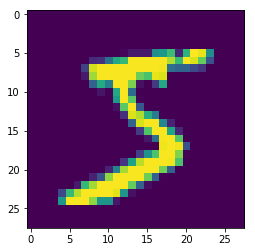

In [10]:
plt.imshow(x_train[0])
print(x_train[0].shape)

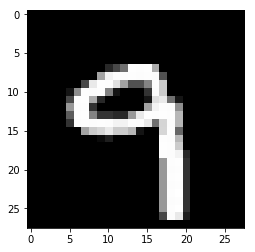

In [53]:
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap='gray')

In [54]:
row=x_train[0].shape[0]
col=x_train[0].shape[1]

x_train=x_train.reshape(x_train.shape[0],row,col,1)
x_test=x_test.reshape(x_test.shape[0],row,col,1)

input_shape=(row,col,1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255

print(x_train.shape)


(60000, 28, 28, 1)


In [55]:
print(y_train)

[5 0 4 ... 5 6 8]


In [56]:

y_train=np_utils.to_categorical(y_train)
print(y_train.shape[1])
print(y_train[0])



10
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [57]:
y_test=np_utils.to_categorical(y_test)
print(y_test.shape[1])
print(y_test[0])

10
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [60]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(4,4),activation="relu",input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation="relu"))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

print(model.summary())



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________
None


In [63]:
 prediction=model.fit(x_train,y_train, epochs=5) 

Epoch 1/5
60000/60000 [==============================] - 36s 608us/step - loss: 0.0324 - acc: 0.9903
Epoch 2/5
60000/60000 [==============================] - 37s 610us/step - loss: 0.0254 - acc: 0.9927
Epoch 3/5
60000/60000 [==============================] - 37s 617us/step - loss: 0.0195 - acc: 0.9945
Epoch 4/5
60000/60000 [==============================] - 37s 613us/step - loss: 0.0165 - acc: 0.9952
Epoch 5/5
60000/60000 [==============================] - 37s 617us/step - loss: 0.0133 - acc: 0.9962


In [67]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 2s 171us/step


[0.048208325578725134, 0.9889]

In [0]:
predictions=model.predict_classes(x_test)

In [71]:
y_test.shape


(10000, 10)

In [0]:
from sklearn.metrics import classification_report


In [76]:
(x1_train,y1_train),(x1_test,y1_test)=mnist.load_data()
print(classification_report(y1_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

